In [2]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns

In [ ]:
test_run = pd.read_csv("../data/rand_run_5000_1.csv")

In [4]:
test_run.head(10)

,Total Kinase,Total Phosphatase,Timestep,Patch Length,dPIP,alphaEnzyme,k_mkon,k_koff,p_mkon,p_koff,k_mkcat,k_mKm,p_mkcat,p_mKm,Kinase in solution,Phosphatase in solution,Average system X,Average dendrite X,Polarization index
0,520.859641,984.864105,0.01,0.5,3.392294,0.230912,0.325587,0.492680,0.046112,0.207982,11.164335,3.539560,12.218907,0.531011,407,1032,0.499834,0.945107,0.654414
1,465.199163,941.806526,0.01,0.5,3.074745,0.192097,0.339972,0.463066,0.051432,0.174202,12.230888,2.644722,12.689427,0.429347,309,846,0.498636,0.945123,0.653423
2,454.038231,937.195128,0.01,0.5,3.938045,0.232732,0.366773,0.492061,0.045611,0.139193,8.075641,3.704511,14.919544,0.401630,298,831,0.502791,0.929335,0.649301
3,487.519247,1006.473821,0.01,0.5,4.112764,0.161575,0.317702,0.579028,0.052530,0.176516,12.421751,3.634139,13.561162,0.592447,485,857,0.503203,0.924929,0.644983
4,516.268104,883.646691,0.01,0.5,4.798411,0.187384,0.286262,0.466465,0.046303,0.188547,7.578705,3.439337,13.025158,0.561078,420,904,0.522484,0.914175,0.636475
5,495.266651,949.198067,0.01,0.5,3.967688,0.189577,0.388034,0.476922,0.052925,0.254093,12.364257,3.117441,17.856207,0.415417,293,1066,0.530078,0.836581,0.610382
6,423.798185,907.375976,0.01,0.5,4.635594,0.191769,0.394807,0.542681,0.049611,0.158331,12.699161,3.605082,15.819867,0.473824,290,776,0.550095,0.825170,0.599544
7,420.968439,827.884045,0.01,0.5,3.054060,0.204833,0.256440,0.593499,0.058090,0.168788,7.084335,3.581107,15.128966,0.567031,484,655,0.559449,0.815933,0.592979
8,509.134552,1004.967042,0.01,0.5,3.617439,0.177708,0.333110,0.580674,0.045515,0.192731,11.697411,2.190233,16.955795,0.454835,472,1066,0.588126,0.829551,0.584337
9,455.317437,1075.798335,0.01,0.5,3.872982,0.224991,0.277313,0.518870,0.044195,0.134444,10.861733,3.076055,16.515060,0.406284,437,949,0.516701,0.796035,0.606390


In [20]:
test_run["Polarized"] = test_run["Polarization index"].map(lambda x: x >= 0.7)
test_run['Enzyme ratio'] = test_run["Total Kinase"] / test_run["Total Phosphatase"]
test_run.describe()

,Total Kinase,Total Phosphatase,Timestep,Patch Length,dPIP,alphaEnzyme,k_mkon,k_koff,p_mkon,p_koff,k_mkcat,k_mKm,p_mkcat,p_mKm,Kinase in solution,Phosphatase in solution,Average system X,Average dendrite X,Polarization index,Enzyme ratio
count,5000.000000,5000.000000,5000.00,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,475.340396,950.095215,0.01,0.5,3.990718,0.200099,0.300270,0.500636,0.049957,0.199313,10.008561,2.905512,14.948643,0.500373,412.214400,915.462400,0.554181,0.782452,0.582030,0.504555
std,43.501142,87.166944,0.00,0.0,0.578225,0.028777,0.057513,0.057517,0.005814,0.058031,1.740367,0.626874,1.743553,0.058125,334.668554,184.149863,0.190882,0.223502,0.090714,0.065651
min,400.001197,800.117194,0.01,0.5,3.000235,0.150013,0.200058,0.400027,0.040000,0.100001,7.001166,1.800386,12.001362,0.400072,113.000000,420.000000,0.173706,0.067368,0.185590,0.365643
25%,438.280429,874.059069,0.01,0.5,3.488749,0.174803,0.251411,0.450103,0.044981,0.149047,8.499417,2.373858,13.391249,0.449366,273.000000,792.000000,0.426705,0.625387,0.506836,0.455888
50%,475.176964,948.798636,0.01,0.5,3.977022,0.200696,0.300161,0.501317,0.049979,0.198590,10.028934,2.904681,14.942153,0.499864,332.000000,914.000000,0.507273,0.858863,0.591249,0.500865
75%,512.765223,1027.165639,0.01,0.5,4.492277,0.224824,0.349745,0.549965,0.055127,0.250282,11.543433,3.447391,16.473235,0.551100,411.000000,1043.000000,0.620223,0.985257,0.649276,0.548407
max,549.997767,1099.969053,0.01,0.5,4.999652,0.249970,0.399992,0.599967,0.059996,0.299953,12.997065,3.999963,17.999524,0.599949,3932.000000,1531.000000,1.000000,1.000000,0.810934,0.684671


In [22]:
polarized_runs = test_run[test_run['Polarized'] == True]
polarized_runs.shape[0]

387

In [152]:
unpolarized_runs = test_run[test_run['Polarized'] == False].copy()
unpolarized_runs.loc[:, 'alphaPIP'] = unpolarized_runs['dPIP'] * 0.01 / (0.5 * 0.5)
unpolarized_runs.shape[0]

287

<Axes: xlabel='Total Kinase', ylabel='Average system X'>

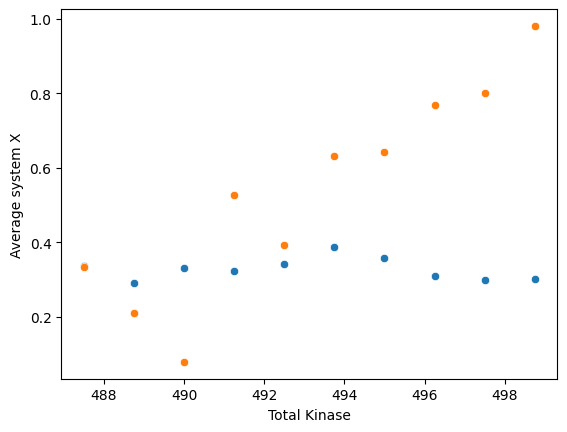

In [153]:
num_k = test_run.loc[:9]
num_p = test_run.loc[10:19]
sns.scatterplot(data=num_k, x='Total Kinase', y='Average system X')
sns.scatterplot(data=num_k, x='Total Kinase', y='Average dendrite X')
# sns.scatterplot(data=num_p, x=test_run['Total Phosphatase'], y=test_run['Polarization index'])


<Axes: xlabel='Polarization index', ylabel='Count'>

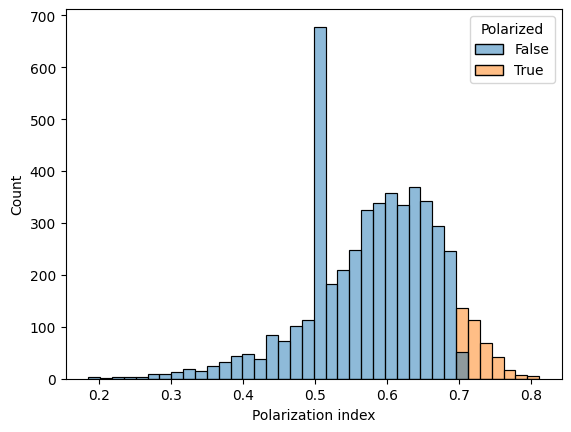

In [15]:
sns.histplot(data=test_run, x='Polarization index', hue=test_run['Polarized'])

<Axes: xlabel='Enzyme ratio', ylabel='Polarization index'>

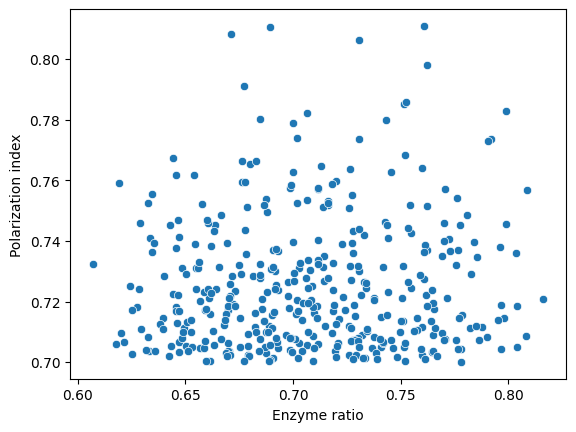

In [25]:
sns.scatterplot(data=polarized_runs, x=np.sqrt(polarized_runs['Enzyme ratio']), y='Polarization index')

<Axes: xlabel='k_mKm', ylabel='k_mkcat'>

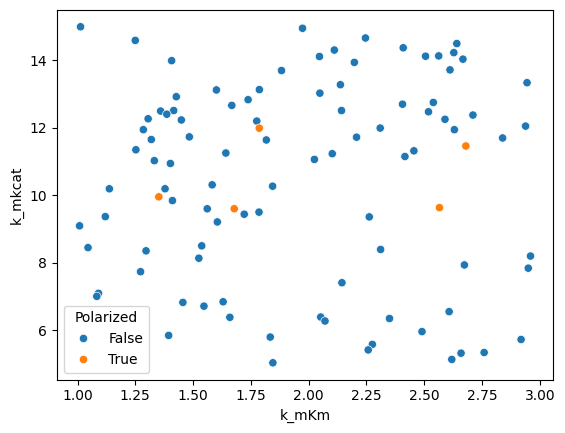

In [63]:
# sns.scatterplot(data=test_run, x=test_run['k_mkon'], y=test_run['p_mkon'], hue=test_run['Polarized'])
# sns.scatterplot(data=test_run, x=test_run['k_mkcat'], y=test_run['p_mkcat'], hue=test_run['Polarized'])
# sns.scatterplot(data=test_run, x=test_run['p_mkon'], y=test_run['p_koff'], hue=test_run['Polarized'])
# sns.scatterplot(data=test_run, x=test_run['Total Kinase'], y=test_run['Total Phosphatase'], hue=test_run['Polarized'])
# sns.scatterplot(data=test_run, x=test_run['Kinase in solution'], y=test_run['Phosphatase in solution'], hue=test_run['Polarized'])
# sns.scatterplot(data=test_run, x=test_run['k_mKm'], y=test_run['p_mKm'], hue=test_run['Polarized'])

<Axes: xlabel='dPIP', ylabel='Count'>

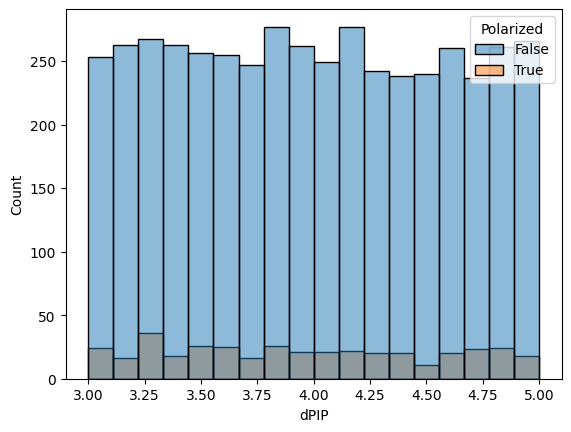

In [10]:
sns.histplot(data=test_run, x=test_run['dPIP'], hue=test_run['Polarized'])
# sns.histplot(data=test_run, x=test_run['alphaEnzyme'], hue=test_run['Polarized'])

<Axes: xlabel='k_mkon', ylabel='k_koff'>

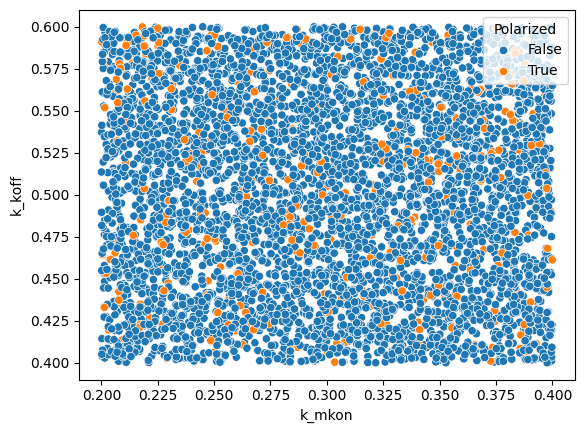

In [11]:
sns.scatterplot(data=test_run, x='k_mkon', y=test_run['k_koff'], hue=test_run['Polarized'])

<Axes: xlabel='Total Kinase', ylabel='Total Phosphatase'>

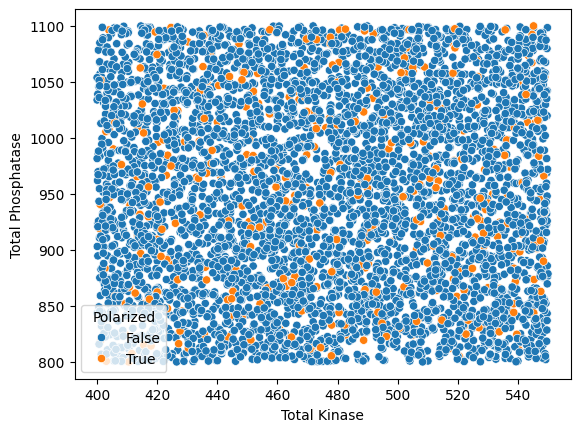

In [12]:
sns.scatterplot(data=test_run, x=test_run['Total Kinase'], y=test_run['Total Phosphatase'], hue=test_run['Polarized'])

<Axes: xlabel='Kinase in solution', ylabel='Phosphatase in solution'>

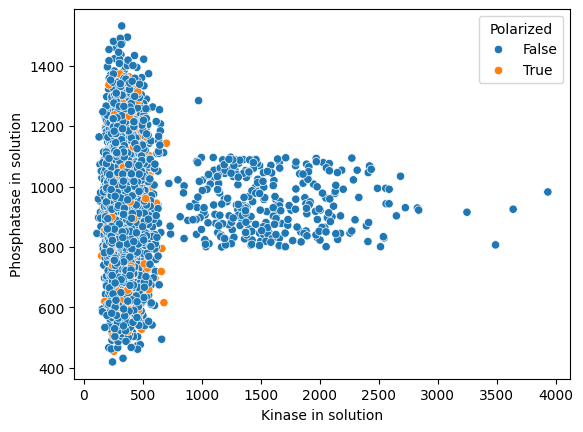

In [13]:
sns.scatterplot(data=test_run, x=test_run['Kinase in solution'], y=test_run['Phosphatase in solution'], hue=test_run['Polarized'])

<Axes: xlabel='k_mKm', ylabel='k_mkcat'>

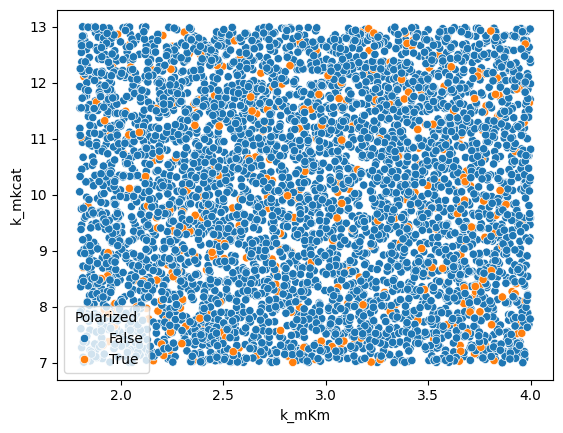

In [14]:
sns.scatterplot(data=test_run, x=test_run['k_mKm'], y=test_run['k_mkcat'], hue=test_run['Polarized'])